In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = np.random.randint(0,100,12)
data

array([22, 63, 92, 36, 65, 60, 90, 55,  8, 57, 51, 14])

<BarContainer object of 12 artists>

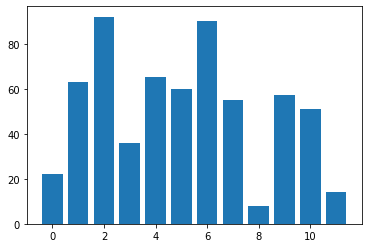

In [0]:
plt.bar(np.arange(len(data)), data)

In [0]:
linedata = np.random.randint(0,20,size=10)
linedata

array([ 4, 16, 14,  5,  3,  4,  8, 11, 14,  8])

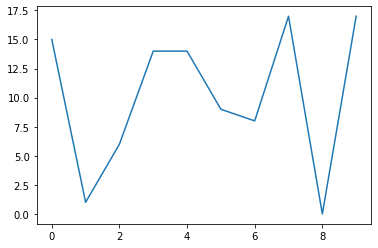

In [0]:
plt.plot(linedata)

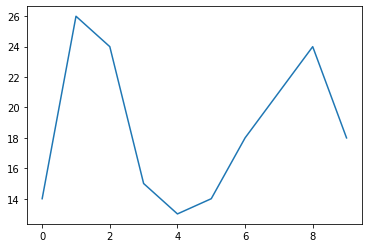

In [0]:
plt.plot(linedata + 10)

In [0]:
import numpy as np
from sklearn.datasets import make_blobs

import urllib
import json
import datetime
import calendar
from os import path
from collections import Counter

JSON_FILE = 'rdu-weather-history1.json'

if not path.exists(JSON_FILE):
    data_url = 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/exports/json'
    urllib.request.urlretrieve(data_url, JSON_FILE)

f = open(JSON_FILE, 'r')
lines = f.readlines()
f.close()
json_data = ''.join(lines)

weather = json.loads(json_data)


weather_by_date = {}
    


In [0]:
weather_by_date = {}
for day in weather:
  dt = datetime.datetime.strptime(day['date'], '%Y-%m-%d')
  if not dt.year in weather_by_date.keys():
    weather_by_date[dt.year] = {}
  if not dt.month in list(weather_by_date[dt.year].keys()):
    weather_by_date[dt.year][dt.month] = []
  weather_by_date[dt.year][dt.month].append(day)


In [0]:
flatten = lambda x: [item for sublist in x for item in sublist]

MONTHS = np.array([calendar.month_abbr[m] for m in (np.arange(12) + 1)])

def monthly_data_by_key(month=1, key='precipitation'):
  monthly_data = flatten([weather_by_date[year][month] for year in weather_by_date.keys()])
  print(monthly_data)
  return [day[key] for day in monthly_data]

def data_by_key(year=2018, key='precipitation'):
    return flatten([weather_by_date[year][month] for month in np.arange(1, 13)])

def monthly_data_values_by_key(month=1, key='precipitation'):
  monthly_data = flatten([weather_by_date[year][month] for year in weather_by_date.keys()])
  return [day[key] for day in monthly_data]

def monthly_freq_counts(month=1, key='precipitation'):
    data = np.array(monthly_data_by_key(month=month, key=key))
    l_bound = np.min(data)
    u_bound = np.max(data)
    intervals = np.linspace(l_bound, u_bound, 11)
    freq = Counter()
    
    for point in data:
        for index, interval in enumerate(intervals):
            if point < interval:
                freq[index] += 1
                break
    
    return [freq[key] for key in sorted(freq.keys())]

def precip_sums_for_year(year=2018):
  if year not in sorted(list(weather_by_date.keys())):
    raise IndexError('Invalid year')
  weather_for_year = weather_by_date[year]
  return sorted(zip(weather_for_year.keys(), [sum([day['precipitation'] for day in weather_for_year[month]]) for month in weather_for_year.keys()]))

def temps_by_month_for_year(year=2018):
    if year not in sorted(list(weather_by_date.keys())):
        raise IndexError('Invalid year')
    the_weather = weather_by_date[year]
    the_weather = dict(zip(sorted(the_weather.keys()), [[day['temperaturemax'] for day in the_weather[month]]  for month in sorted(the_weather.keys())]))
    for key in the_weather.keys():
        if len(the_weather[key] < 31):
            the_weather[key]
    

def get_wind_points():
    avg_wind = monthly_data_by_key(month=1, key='avgwindspeed')
    fast_wind = monthly_data_by_key(month=1, key='fastest5secwindspeed')
    
    points = list(zip(avg_wind, fast_wind))
    points = np.array([point for point in points if point[0] is not None and point[1] is not None])
    for _ in range(5):
        mindex = np.argmax(points[:,1])
        points = np.delete(points, mindex, 0)
    return points

def get_blobs():
    return make_blobs(n_samples=200, centers=5)

def get_normal_counts(n_samples=10000):
    data = np.random.randn(n_samples)
    freq = Counter()
    
    l_bound = np.min(data)
    u_bound = np.max(data)
    intervals = np.linspace(l_bound, u_bound, 21)
    
    for point in data:
        for index, interval in enumerate(intervals):
            if point < interval:
                freq[index] += 1
                break
                
    return [freq[key] for key in sorted(freq.keys())]
    



In [0]:
precip_2018 = precip_sums_for_year()
precip_2018

[(1, 3.92),
 (2, 1.7000000000000002),
 (3, 4.799999999999999),
 (4, 5.35),
 (5, 5.12),
 (6, 1.9799999999999998),
 (7, 4.92),
 (8, 6.619999999999999),
 (9, 7.970000000000001),
 (10, 4.579999999999999),
 (11, 7.1),
 (12, 6.230000000000001)]

In [0]:
precip = [month[1] for month in precip_2018]
precip

[3.92,
 1.7000000000000002,
 4.799999999999999,
 5.35,
 5.12,
 1.9799999999999998,
 4.92,
 6.619999999999999,
 7.970000000000001,
 4.579999999999999,
 7.1,
 6.230000000000001]

list comprehension

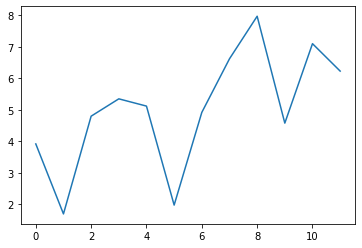

In [0]:
plt.plot(precip)

VAlue in the x asis are not helpful 

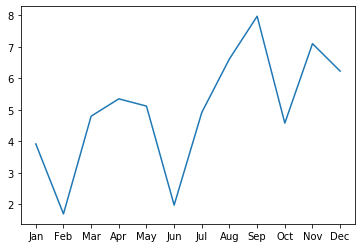

In [0]:
plt.plot(precip)
plt.xticks(ticks = np.arange(len(precip)), labels = MONTHS);

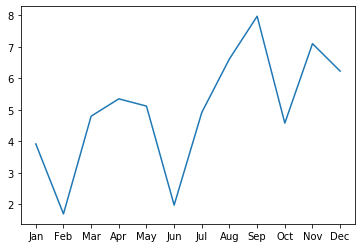

In [0]:
plt.plot(precip)
plt.xticks(ticks = np.arange(len(precip)), labels = MONTHS);

Question to the team; what will be the output if i just send the array valu


['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


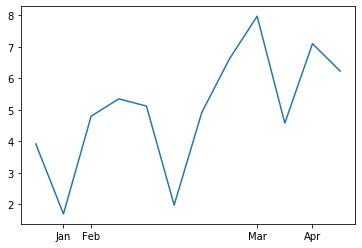

In [0]:
print(MONTHS)
plt.plot(precip)
plt.xticks(ticks = np.array([1,2,8,10]), labels = MONTHS);

Waht to do to get the all the month name to display... why we are only getting four month name

In [0]:
low_precip = np.argmin(precip)
high_precip =  np.argmax(precip)
print(low_precip , high_precip)

1 8


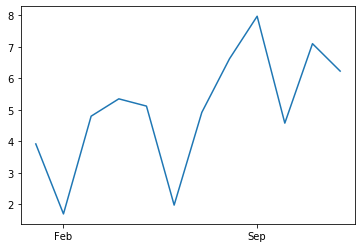

In [0]:
plt.plot(precip)
plt.xticks(ticks = np.array([low_precip, high_precip]), labels=MONTHS[[low_precip,high_precip]]);

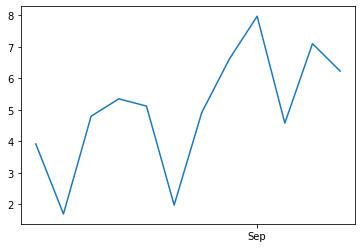

In [0]:
plt.plot(precip)
plt.xticks(ticks = np.array([high_precip]), labels=MONTHS[[high_precip]]);

WE have only one string why ???? 
waht will happen if we have empy iterable on the labels


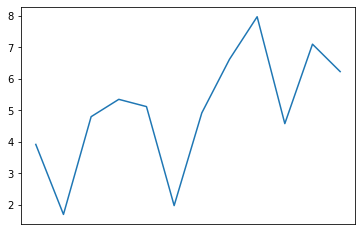

In [0]:
plt.plot(precip)
plt.xticks(ticks =[]);

let us now do for Y Axix where we will pick the value from lower to upper with range of .5 as difference


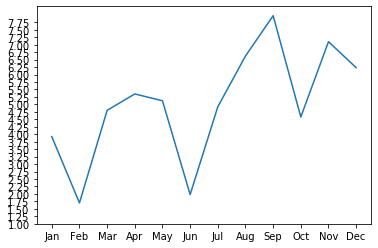

In [0]:
import math
lower = math.floor(np.argmin(precip))
upper = math.ceil(np.argmax(precip))
precip_ticks = np.arange(lower, upper,0.25)
plt.plot(precip)
plt.xticks(ticks=np.arange(len(precip)),labels = MONTHS)
plt.yticks(ticks = precip_ticks);

This part is for continuation of Stacked Chart explanation
let us take the usecase of showing the percipitation value for different years


In [0]:
precip_2016 = precip_sums_for_year(year=2016)
precip_2017 = precip_sums_for_year(year=2017)
precip_2018 = precip_sums_for_year(year=2018)

In [0]:
values_2018 = np.array([month[1] for month in precip_2018])
values_2017 = np.array([month[1] for month in precip_2017])
values_2016 = np.array([month[1] for month in precip_2016])


<BarContainer object of 12 artists>

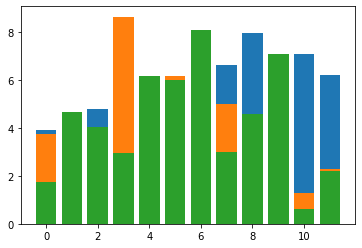

In [0]:
plt.bar(np.arange(len(MONTHS)), values_2018)
plt.bar(np.arange(len(MONTHS)), values_2017)
plt.bar(np.arange(len(MONTHS)), values_2016)

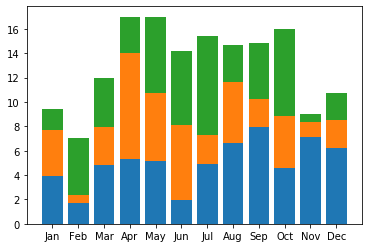

In [0]:
plt.bar(np.arange(len(MONTHS)), values_2018)
plt.bar(np.arange(len(MONTHS)), values_2017, bottom= values_2018)
plt.bar(np.arange(len(MONTHS)), values_2016, bottom= values_2018 + values_2017)
plt.xticks(ticks=np.arange(len(MONTHS)),labels = MONTHS[[0,1,2,4,6]]);
#there is an error here it worked previously in the line chart why not here??? Please help me with answers.
plt.xticks(ticks=np.arange(len(MONTHS)),labels = MONTHS);

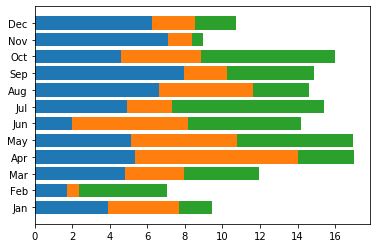

In [0]:
plt.barh(np.arange(len(MONTHS)), values_2018)
plt.barh(np.arange(len(MONTHS)), values_2017, left= values_2018)
plt.barh(np.arange(len(MONTHS)), values_2016, left= values_2018 + values_2017)
plt.yticks(ticks=np.arange(len(MONTHS)),labels = MONTHS[[0,1,2,4,6]]);
#there is an error here it worked previously in the line chart why not here??? Please help me with answers.
plt.yticks(ticks=np.arange(len(MONTHS)),labels = MONTHS);

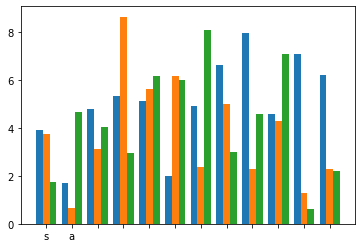

In [0]:

#why algorithm is  more important ( there is no API in matplotlib to accept two datasets, it is how we imagine and coming up with algo)
#how to group the data in single xais
group_width = 0.8
plt.bar(np.arange(len(MONTHS)) - group_width /3, values_2018, group_width/3);
plt.bar(np.arange(len(MONTHS)), values_2017, group_width/3);
plt.bar(np.arange(len(MONTHS)) + group_width /3, values_2016, group_width/3);
plt.xticks(ticks = np.arange(len(MONTHS)), labels = 'sa');

Pie char is one kind of group chart
pie chart will take only one dataset
pie chart will take only percentage and adds up to 100%
values are wedges, the size of each wedges is proportional to the total of the values
Each wedge/value is represented by a slice of the pie


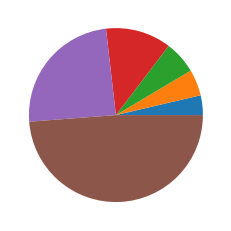

In [0]:
wedges = [3,4,5,10,20,40]
plt.pie(wedges);

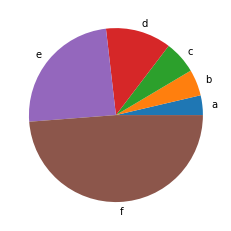

In [0]:
#will this work plt.pie(wedges, labels=list('abcd')); why because it has to accept 5 valeus for label
plt.pie(wedges, labels=list('abcdef'));


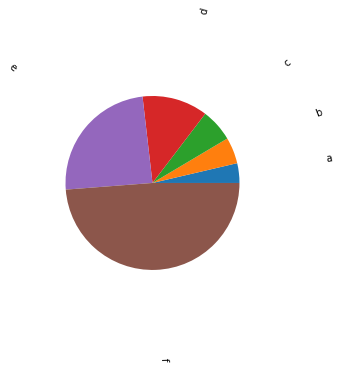

In [0]:
plt.pie(wedges, labels=list('abcdef'),labeldistance=2, rotatelabels="True");

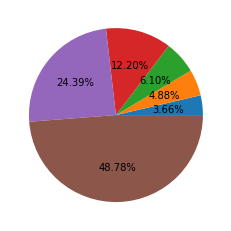

In [0]:
plt.pie(wedges, autopct='%.2f%%');

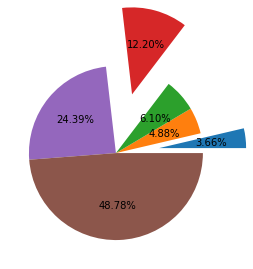

In [0]:
plt.pie(wedges, autopct='%.2f%%',explode=[0.5,0,0,0.7,0,0]);

In [0]:
#where pie chat will start the painting from the right side 
# even the labels from the start
Totals = [month[1] for month in precip_2018]

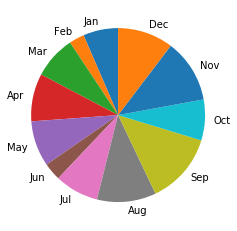

In [0]:
plt.pie(Totals, labels=MONTHS, startangle=90);
# default starts with 0degree

In [0]:
#which month in 2018 has high percipitation
sept_precip = [month[8][1] for month in [precip_2018,precip_2017,precip_2016]]

[7.970000000000001, 2.2800000000000002, 4.61]


In [0]:
print([precip_2018])

[[(1, 3.92), (2, 1.7000000000000002), (3, 4.799999999999999), (4, 5.35), (5, 5.12), (6, 1.9799999999999998), (7, 4.92), (8, 6.619999999999999), (9, 7.970000000000001), (10, 4.579999999999999), (11, 7.1), (12, 6.230000000000001)]]


Scatter Plot
will give you relation
Order is not significant
accepts two iterables

positive and negative correlation with example


Quantile Plot to be drawn.
